In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from scipy.optimize import fmin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns

np.random.seed(12)

In [199]:
# loading the Treasury Bill data
rr = pd.read_csv('Treasury Bill Ratess.csv')

In [203]:
# Arranging the time(date) in ascending order
rr = rr.iloc[::-1,:]
rr.reset_index(drop=True, inplace=True)
# changing time to date format
rr['year']= pd.to_datetime(rr['Issue Date'], dayfirst=True, format='mixed').dt.year



In [204]:
rr

,Issue Date,Tender,Security Type,Discount Rate,Interest Rate,year
0,05 Jun 2017,1540,91 DAY BILL,12.0180,12.3903,2017
1,04 Dec 2017,1566,91 DAY BILL,12.9099,13.3405,2017
2,29 Jan 2018,1574,91 DAY BILL,12.9201,13.3513,2018
3,05 Feb 2018,1575,91 DAY BILL,12.8912,13.3205,2018
4,12 Feb 2018,1576,91 DAY BILL,12.9332,13.3653,2018
...,...,...,...,...,...,...
325,08 Apr 2024,1897,91 DAY BILL,24.1768,25.7321,2024
326,15 Apr 2024,1898,91 DAY BILL,24.1830,25.7391,2024
327,22 Apr 2024,1899,91 DAY BILL,24.1032,25.6487,2024
328,29 Apr 2024,1900,91 DAY BILL,24.0140,25.5478,2024


In [205]:
# subsetting year values greater than 2021
rr = rr[rr['year']>2021]
rr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 207 to 329
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Issue Date     123 non-null    object 
 1   Tender         123 non-null    int64  
 2   Security Type  123 non-null    object 
 3   Discount Rate  123 non-null    float64
 4   Interest Rate  123 non-null    float64
 5   year           123 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 6.2+ KB


In [206]:
# taking log to reduce the skewness
rr['log Interest rate'] = np.log(rr['Interest Rate'])
rr

/tmp/ipykernel_2758/2790801730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['log Interest rate'] = np.log(rr['Interest Rate'])


,Issue Date,Tender,Security Type,Discount Rate,Interest Rate,year,log Interest rate
207,03 Jan 2022,1779,91 DAY BILL,12.1453,12.5256,2022,2.527775
208,10 Jan 2022,1780,91 DAY BILL,12.1446,12.5249,2022,2.527719
209,17 Jan 2022,1781,91 DAY BILL,12.1412,12.5213,2022,2.527431
210,24 Jan 2022,1782,91 DAY BILL,12.1646,12.5461,2022,2.529410
211,31 Jan 2022,1783,91 DAY BILL,12.2467,12.6335,2022,2.536352
...,...,...,...,...,...,...,...
325,08 Apr 2024,1897,91 DAY BILL,24.1768,25.7321,2024,3.247739
326,15 Apr 2024,1898,91 DAY BILL,24.1830,25.7391,2024,3.248011
327,22 Apr 2024,1899,91 DAY BILL,24.1032,25.6487,2024,3.244493
328,29 Apr 2024,1900,91 DAY BILL,24.0140,25.5478,2024,3.240551


In [208]:
# taking square root to reduce the skewness
rr['square'] = np.sqrt(rr['Interest Rate'])
rr

/tmp/ipykernel_2758/2072040789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['square'] = np.sqrt(rr['Interest Rate'])


,Issue Date,Tender,Security Type,Discount Rate,Interest Rate,year,log Interest rate,square
207,03 Jan 2022,1779,91 DAY BILL,12.1453,12.5256,2022,2.527775,3.539152
208,10 Jan 2022,1780,91 DAY BILL,12.1446,12.5249,2022,2.527719,3.539054
209,17 Jan 2022,1781,91 DAY BILL,12.1412,12.5213,2022,2.527431,3.538545
210,24 Jan 2022,1782,91 DAY BILL,12.1646,12.5461,2022,2.529410,3.542047
211,31 Jan 2022,1783,91 DAY BILL,12.2467,12.6335,2022,2.536352,3.554364
...,...,...,...,...,...,...,...,...
325,08 Apr 2024,1897,91 DAY BILL,24.1768,25.7321,2024,3.247739,5.072682
326,15 Apr 2024,1898,91 DAY BILL,24.1830,25.7391,2024,3.248011,5.073372
327,22 Apr 2024,1899,91 DAY BILL,24.1032,25.6487,2024,3.244493,5.064455
328,29 Apr 2024,1900,91 DAY BILL,24.0140,25.5478,2024,3.240551,5.054483


In [209]:

# function to estimate parameters
def ols_cir(data, dt):

    # define variables
    Nsteps = len(data)
    rs = data[:Nsteps - 1]  
    rt = data[1:Nsteps]
    
    # model initialization
    model = LinearRegression()

    # feature engineering to fit the theoretical model
    y = (rt - rs) / np.sqrt(rs)
#     print(y)
    z1 = dt / np.sqrt(rs)
    z2 = dt * np.sqrt(rs)
    X = np.column_stack((z1, z2))

    # fit the model
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)

    # calculate the predicted values (y_hat), residuals and the parameters
    y_hat = model.predict(X)
    residuals = y - y_hat
    beta1 = model.coef_[0]        
    beta2 = model.coef_[1]

    # get the parameter of interest for CIR
    k0 = -beta2
    theta0 = beta1/k0
    sigma0 = np.std(residuals)/np.sqrt(dt)
    
    return k0, theta0, sigma0,y_hat

In [210]:
# Descriptive Statistics
(rr['Interest Rate']/100).describe()

count    123.000000
mean       0.254433
std        0.066571
min        0.125213
25%        0.203445
50%        0.264987
75%        0.295332
max        0.361825
Name: Interest Rate, dtype: float64

In [211]:
# assinging variables that will be printed from our ols_cir function
a,b,c,d = ols_cir(np.array(rr['Interest Rate']/100),1/100)
print(f' k0:{a}, theta0:{b}, sigma0:{c}')

 k0:2.3999503050143196, theta0:0.2985680586886948, sigma0:0.21267601614865567


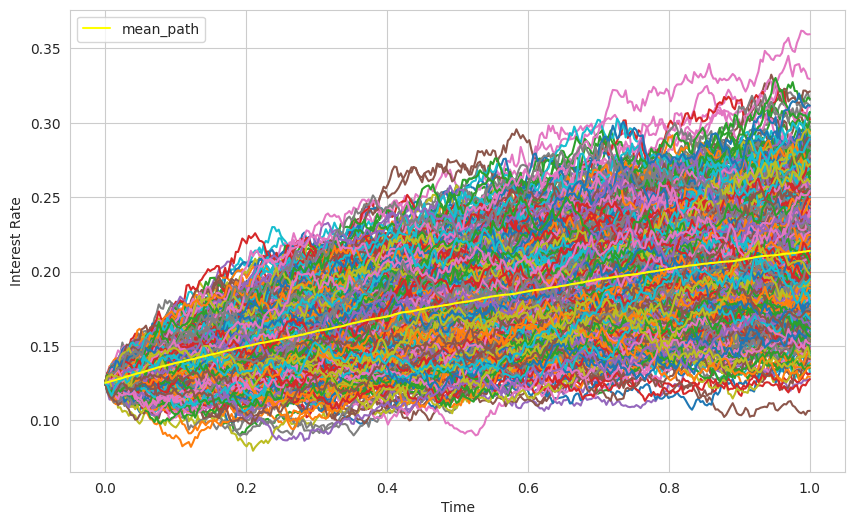

In [212]:
def simulate_CIR(kappa, theta, sigma, r0, T, n_paths, n_steps):
    dt = T / n_paths
    sqrt_dt = np.sqrt(dt)
    r = np.zeros((n_paths, n_steps+1))
    r[:, 0] = r0
    rng = np.random.default_rng(seed=12)

    for i in range(n_steps):
        dW = rng.normal(0, sqrt_dt, size=(n_paths))
#         r[:, i+1] = r[:, i] + kappa * (theta - np.maximum(0, r[:, i])) * dt + sigma * np.sqrt(np.maximum(0, r[:, i])) * dW
        r[:, i+1] = np.maximum(0, r[:, i]) + kappa * (theta - np.maximum(0, r[:, i])) * dt + sigma * np.sqrt(np.maximum(0, r[:, i])) * dW
#     print(r)  
    return r

# Example parameters 
kappa = 2.40
theta = 0.29
sigma = 0.21
r0 = (np.array(rr['Interest Rate'])/100)[0]  
T = 1
n_paths = 1000
n_steps = 329
# Simulate paths
paths = simulate_CIR(kappa, theta, sigma, r0, T, n_paths, n_steps)
mean_path = np.mean(paths, axis=0)
# print(paths[:5])
# mse_paths = 1/len(data)*np.mean((paths - data)**2, axis=1)


# Plot the paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(np.linspace(0, T, n_steps+1), paths[i])
plt.plot(np.linspace(0, T, n_steps+1),mean_path, color = 'yellow', label = 'mean_path')

# plt.title('Simulated Paths for the CIR Model')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.grid(True)
# plt.show()

# Add legend
plt.legend()
plt.savefig('g.png')

In [213]:
# subsetting all the rows excluding the last one
kkk = rr.iloc[:-1,:] 
kkk

,Issue Date,Tender,Security Type,Discount Rate,Interest Rate,year,log Interest rate,square
207,03 Jan 2022,1779,91 DAY BILL,12.1453,12.5256,2022,2.527775,3.539152
208,10 Jan 2022,1780,91 DAY BILL,12.1446,12.5249,2022,2.527719,3.539054
209,17 Jan 2022,1781,91 DAY BILL,12.1412,12.5213,2022,2.527431,3.538545
210,24 Jan 2022,1782,91 DAY BILL,12.1646,12.5461,2022,2.529410,3.542047
211,31 Jan 2022,1783,91 DAY BILL,12.2467,12.6335,2022,2.536352,3.554364
...,...,...,...,...,...,...,...,...
324,01 Apr 2024,1896,91 DAY BILL,24.1920,25.7493,2024,3.248407,5.074377
325,08 Apr 2024,1897,91 DAY BILL,24.1768,25.7321,2024,3.247739,5.072682
326,15 Apr 2024,1898,91 DAY BILL,24.1830,25.7391,2024,3.248011,5.073372
327,22 Apr 2024,1899,91 DAY BILL,24.1032,25.6487,2024,3.244493,5.064455


In [214]:
# constructing a dataframe of the predicted interest rates
tmp_df = pd.DataFrame(
    {
        'timestamp': kkk['Issue Date'],
        'pred': d
    }
).set_index('timestamp')
tmp_df

,pred
timestamp,
03 Jan 2022,0.011753
10 Jan 2022,0.011753
17 Jan 2022,0.011757
24 Jan 2022,0.011729
31 Jan 2022,0.011629
...,...
01 Apr 2024,0.001943
08 Apr 2024,0.001951
15 Apr 2024,0.001948


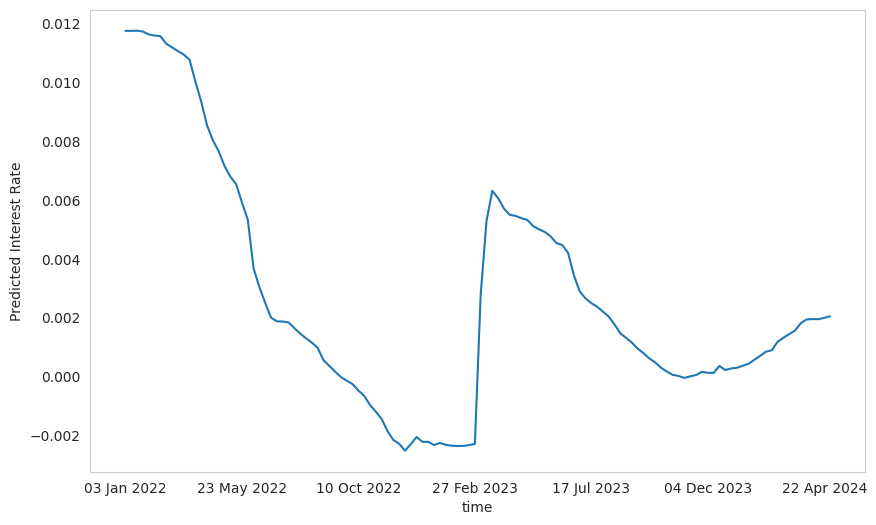

In [217]:
# plotting the predicted rates
fig, ax = plt.subplots(figsize=(10, 6))
tmp_df["pred"].plot(xlabel = "time", ylabel="Predicted Interest Rate", ax=ax)
plt.grid(False)
plt.savefig('Pred')

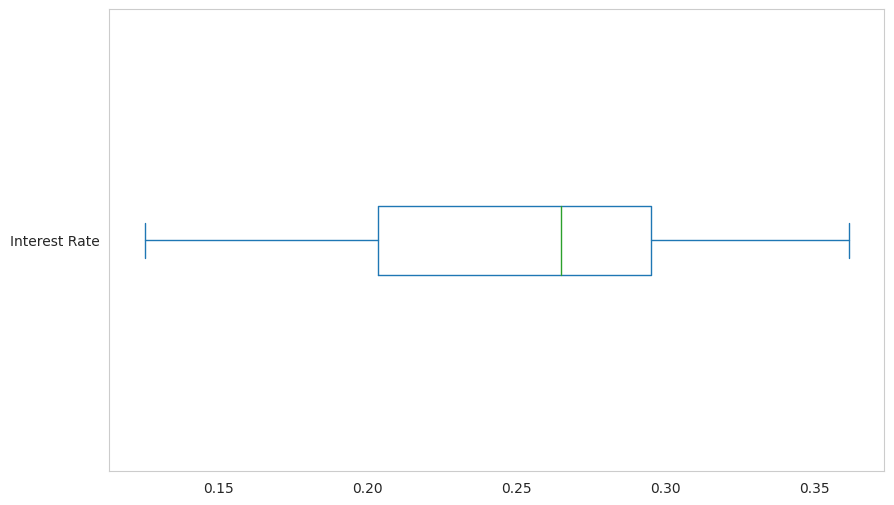

In [219]:
# boxplot of the data
fig, ax = plt.subplots(figsize=(10, 6))
(rr["Interest Rate"]/100).plot(kind = "box", vert = False,  ax=ax)
plt.grid(False)
plt.savefig('Box')

In [220]:
# function to simulate paths
def simulate_cir(k, theta, sigma, r0, T, N):

    # populate an empty array
    dt = T / N
    interest_rate_paths = np.zeros(N+1)
    interest_rate_paths[0] = r0 
    for t in range(1, N+1):
        Z = np.random.randn()
        r = interest_rate_paths[t-1]
        interest_rate_paths[t] = r + k * (theta-r) * dt + sigma * np.sqrt(dt) * np.sqrt(max(0, r)) * Z    
    return interest_rate_paths

In [221]:
k_true = 2.3999503050143196  # True mean reversion speed
theta_true = 0.2985680586886948 # True long-run mean
sigma_true = 0.21267601614865567 # True volatility of interest rates
r0_true = 0.025278 # True initial interest rate
T = 1  # Time horizon
N = 122  # Number of time steps
dt = T/N
# simulated path
np.random.seed(123)
series = simulate_cir(k_true, theta_true, sigma_true, r0_true, T, N)

In [222]:
series

array([0.025278  , 0.02733061, 0.03584107, 0.04204089, 0.04114041,
       0.04394475, 0.05561946, 0.04937911, 0.05244591, 0.06286976,
       0.06332181, 0.06466014, 0.0687978 , 0.08084989, 0.08163484,
       0.08345975, 0.08527519, 0.10187445, 0.11918308, 0.12938615,
       0.13538898, 0.14382313, 0.15775284, 0.153366  , 0.16508877,
       0.15790489, 0.15579233, 0.16549495, 0.1569218 , 0.15863985,
       0.15478359, 0.15567568, 0.1372254 , 0.12776342, 0.12630659,
       0.13604197, 0.13800599, 0.14118488, 0.1492601 , 0.14565444,
       0.15074676, 0.14763383, 0.13782116, 0.1381891 , 0.14545118,
       0.15094965, 0.15376505, 0.17467679, 0.18043682, 0.19076576,
       0.21170889, 0.20195264, 0.19486467, 0.21172578, 0.20636341,
       0.20843687, 0.21961   , 0.22920033, 0.24674181, 0.26206634,
       0.27332538, 0.26604347, 0.27457747, 0.27822026, 0.26515067,
       0.27986031, 0.28845094, 0.28912039, 0.28689298, 0.27476418,
       0.27724623, 0.28241491, 0.27422787, 0.28642531, 0.27535

In [223]:
# computing the mean_squared_error
MSE = (np.sum(((rr['Interest Rate']/100)-series)**2))/len(series)

In [224]:
# SSE = np.sum(((rr['Interest Rate']/100)-series)**2)
# SST = np.sum((rr['Interest Rate']/100-np.mean(rr['Interest Rate']/100))**2)
# SSE/SST

In [225]:
# calculation of the skewness
stats.skew(rr['Interest Rate']/100)

-0.3840215314973844

In [226]:
# constructing a dataframe of the simulated path
tmp_d = pd.DataFrame(
    {
        'timestamp': rr['Issue Date'],
        'Actual rate': np.array(rr['Interest Rate']/100),
        'Simulated': series
    }
).set_index('timestamp')
tmp_d

,Actual rate,Simulated
timestamp,,
03 Jan 2022,0.125256,0.025278
10 Jan 2022,0.125249,0.027331
17 Jan 2022,0.125213,0.035841
24 Jan 2022,0.125461,0.042041
31 Jan 2022,0.126335,0.041140
...,...,...
08 Apr 2024,0.257321,0.264845
15 Apr 2024,0.257391,0.284925
22 Apr 2024,0.256487,0.264380


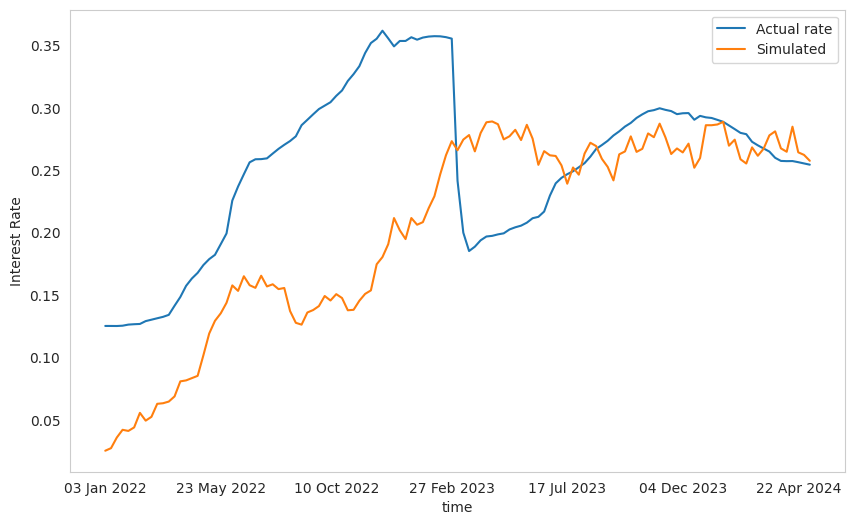

In [276]:
# plot of the actual rate versus the simulated rate
fig, ax = plt.subplots(figsize=(10, 6))
tmp_d["Actual rate"].plot(xlabel = "time", ylabel="Interest Rate",  ax=ax)
tmp_d['Simulated'].plot(xlabel = "time", ylabel="Interest Rate",  ax=ax)
plt.legend()
plt.grid(False)
plt.savefig('combined')

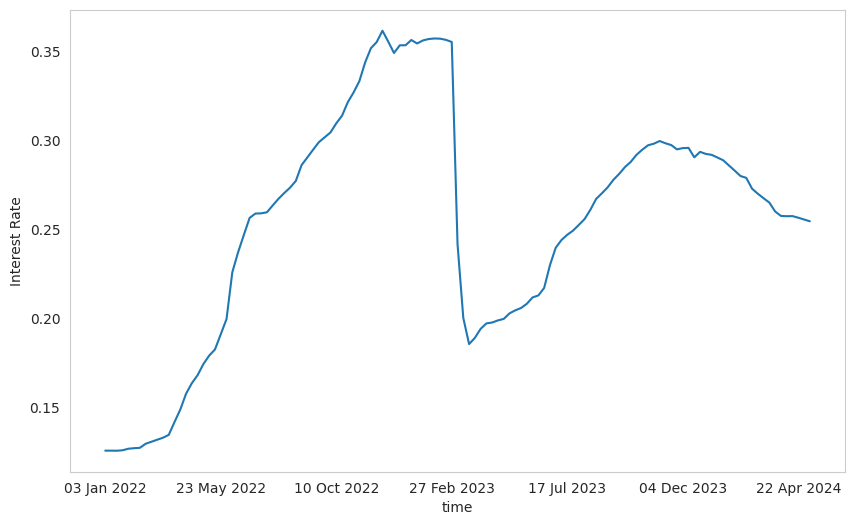

In [231]:
# plot of the observed interest rate
fig, ax = plt.subplots(figsize=(10, 6))
tmp_d["Actual rate"].plot(xlabel = "time", ylabel="Interest Rate",  ax=ax)
plt.grid(False)
plt.savefig('d')

In [232]:
# # define variables
# n_scenarios = 10000
# paths = np.zeros(shape=(n_scenarios, N+1))
# OLS_estimates = np.zeros(shape=(n_scenarios,3))

# # OLS_estimates[:,0]


# # perform simulations
# np.random.seed(123)
# count = 0
# while count < n_scenarios:
#     # fill the array with the simulations
#     series = simulate_cir(k_true, theta_true, sigma_true, r0_true, T, N)
    
#     # Check if there's at least one negative number in the series
#     if np.any(series < 0):
#         # Calculate the value of the 99th percentile
#         percentile_99 = np.percentile(series, 99)
#         # Add the value of the 99th percentile to each element of the series
#         series += percentile_99

#     paths[count, :] = series
    
#     # OLS estimation
#     estimates = ols_cir(series, dt)
#     OLS_estimates[count,:] = estimates
    
#     # update counter
#     count += 1

# # plot of the estimates distributions
# colours = ["blue", "red", "green"] 
# parameters = ["k", "Theta", "Sigma"] 
# real_values = [k_true, theta_true, sigma_true]

# # Set the seaborn style
# sns.set_style("whitegrid")
# for i in range(3):  # Using range(3) for iterating over indices

#     # Set up the plot
#     plt.figure(figsize=(7, 5))
#     arrr = np.array(OLS_estimates)
#     sns.histplot(arrr[:,i], bins=500, color=colours[i], alpha=0.7, kde=True)

#     # Plot mean as black dot line
#     mean_estimate = np.mean(OLS_estimates[:, i])
#     plt.axvline(mean_estimate, color="black", linestyle="--", label="Monte-Carlo Mean")

#     # Plot specified value as purple dot line
#     plt.axvline(real_values[i], color="purple", linestyle="-.", label="Theoretical Value")

#     plt.xlabel("Estimates", fontsize="medium")
#     plt.ylabel("Frequency", fontsize="medium")
#     plt.title(parameters[i], fontsize="large")
#     plt.legend(title_fontsize="small", fontsize="x-small")
#     plt.show()

In [233]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.linear_model import LinearRegression

# # Parameters for the true CIR process
# k_true = 0.5       # Speed of mean reversion
# theta_true = 0.1   # Long-term mean
# sigma_true = 0.1   # Volatility of interest rate
# r0_true = 0.05     # Initial interest rate
# T = 1.0            # Total time
# dt = 0.01          # Time step
# N = int(T / dt)    # Number of time steps

# # Function to simulate CIR process
# def simulate_cir(k, theta, sigma, r0, T, N):
#     dt = T / N
#     r = np.zeros(N+1)
#     r[0] = r0
#     for n in range(N):
#         dZ = np.random.normal(0, np.sqrt(dt))
#         r[n+1] = r[n] + k * (theta - r[n]) * dt + sigma * np.sqrt(np.abs(r[n])) * dZ
#     return r

# # Function to perform OLS estimation on CIR process
# def ols_cir(series, dt):
#     Y = (series[1:] - series[:-1]) / dt
#     X = np.vstack([series[:-1], np.ones(len(series)-1)]).T
#     model = LinearRegression(fit_intercept=False)
#     model.fit(X, Y)
#     k_estimated = model.coef_[0]
#     theta_estimated = model.intercept_ / model.coef_[0]
#     residuals = Y - model.predict(X)
#     sigma_estimated = np.sqrt(np.mean(residuals**2))
#     return k_estimated, theta_estimated, sigma_estimated

# # Simulation parameters
# n_scenarios = 10000
# paths = np.zeros((n_scenarios, N+1))
# OLS_estimates = np.zeros((n_scenarios, 3))

# # Perform simulations and OLS estimations
# np.random.seed(123)
# count = 0
# while count < n_scenarios:
#     # Simulate CIR process
#     series = simulate_cir(k_true, theta_true, sigma_true, r0_true, T, N)
    
#     # Check for negative values and adjust if necessary
#     if np.any(series < 0):
#         percentile_99 = np.percentile(series, 99)
#         series += percentile_99

#     paths[count, :] = series
    
#     # OLS estimation
#     estimates = ols_cir(series, dt)
#     OLS_estimates[count, :] = list(estimates)
    
#     # Update counter
#     count += 1

# # Plot the estimates distributions
# colours = ["blue", "red", "green"] 
# parameters = ["k", "Theta", "Sigma"] 
# real_values = [k_true, theta_true, sigma_true]

# # Set the seaborn style
# sns.set_style("whitegrid")
# for i in range(3):
#     plt.figure(figsize=(7, 5))
#     sns.histplot(OLS_estimates[:, i], bins=500, color=colours[i], alpha=0.7, kde=True)
#     mean_estimate = np.mean(OLS_estimates[:, i])
#     plt.axvline(mean_estimate, color="black", linestyle="--", label="Monte-Carlo Mean")
#     plt.axvline(real_values[i], color="purple", linestyle="-.", label="Theoretical Value")
#     plt.xlabel("Estimates", fontsize="medium")
#     plt.ylabel("Frequency", fontsize="medium")
#     plt.title(parameters[i], fontsize="large")
#     plt.legend(title_fontsize="small", fontsize="x-small")
#     plt.show()


In [234]:
# checking the version of the pandas being used
import matplotlib
pd.__version__

'2.2.2'

In [235]:
# creating a dataframe of the log interest rate
df=pd.DataFrame({'timestamp': rr['Issue Date'], 'Interest':rr['log Interest rate']/100}).set_index('timestamp')

In [236]:
df

,Interest
timestamp,
03 Jan 2022,0.025278
10 Jan 2022,0.025277
17 Jan 2022,0.025274
24 Jan 2022,0.025294
31 Jan 2022,0.025364
...,...
08 Apr 2024,0.032477
15 Apr 2024,0.032480
22 Apr 2024,0.032445


In [237]:
# fig, ax = plt.subplots(figsize=(10, 6))
# df["Interest"].plot(xlabel = "time", ylabel="Interest Rate", title = "Actual Interest Rate Time Series", ax=ax)
# plt.savefig('fig')

In [238]:
# plt.subplot(2, 3, 5)
# plt.hist(rr['normalized'], bins=30)
# plt.title('Box-Cox Transformation')


In [239]:
# # Step 1: Compute Y and Z
# print('The results after taking the log of the 91 Days Treasury rates:')
# def compute_Y_Z(data,delta_t):
#     n = len(data)
#     Y = np.zeros(n - 1)
#     Z = np.ones((n - 1, 2))*delta_t
#     for i in range(n - 1):
#         Y[i] = round((data[i + 1] - data[i]) / np.sqrt(np.abs(data[i])),5)
#         Z[i, 0] *= 1 / np.sqrt(np.abs(data[i]))
#         Z[i, 1] *= np.sqrt(np.abs(data[i]))
#     return Y, Z

# # Step 2: Compute beta_hat
# def compute_beta_hat(Y, Z):
#     Z_transpose_Z_inv = np.linalg.inv(np.dot(Z.T, Z))
#     beta_hat = np.dot(np.dot(Z_transpose_Z_inv, Z.T), Y)
#     alpha = -beta_hat[1]
#     mu = beta_hat[0]/alpha
#     res = [alpha, mu]
    
#     return beta_hat

# # Example 
# data = np.array(rr['log']/100)
# # Compute Y and Z
# delta_t = 1
# Y, Z = compute_Y_Z(data,delta_t)

# # Compute beta_hat
# res = compute_beta_hat(Y, Z)
# # print("params:",res)
# # print(res)
# def compute_sigma(data, delta_t):
#     n = len(data)
#     print(n)
#     Y, Z = compute_Y_Z(data,delta_t)
#     res = compute_beta_hat(Y, Z)
#     Y_pred = Z.dot(res)
#     print(f'y_pred len {len(Y_pred)}')
#     plt.plot(Y_pred)
#     residuals = Y-Y_pred
#     print((np.array(Z.dot(res))>0).sum())
#     summ_sq_r = np.sum(residuals**2)
# #     print(summ_sq_r)
#     total_summ_sq = np.sum((Y-np.mean(Y))**2)
# #     print(total_summ_sq)
#     R_2 = 1-summ_sq_r/total_summ_sq
#     ms = 1/n *np.sum(residuals**2)
#     print(f'MSE:{round(ms*100,4)}%')
#     print(f'R_squared: {R_2*100}%')
#     ad_r_s = 1-((1-R_2)*(len(data)-1))/(len(data)-3)
#     print(f'Adjusted R_squared: {ad_r_s*100}%')
    
#     # Step 5: Compute sigma
#     sigma_hat = np.linalg.norm(residuals) / np.sqrt(delta_t * n)
    
#     return sigma_hat

# data = np.array(rr['log']/100)

# # Example parameters 
# alpha = -res[1]
# mu = res[0]/alpha
# delta_t = 1


# # Compute sigma
# sigma_hat = compute_sigma(data,delta_t)
# # print("Estimated paramms:",list(alpha,mu,sigma_hat))
# print(f'Estimated params:alpha:{alpha}, mu:{mu},sigma:{sigma_hat}')

In [240]:
# Y, Z = compute_Y_Z(data,delta_t)
# res = compute_beta_hat(Y, Z)
# Y_pred = Z.dot(res)
# # len(Y_pred)



In [241]:
# stats.skew(Y_pred)

In [242]:
# fig, ax = plt.subplots(figsize=(10, 6))
# df["Interest"].plot(xlabel = "time", ylabel="Interest Rate", title = "Actual Interest Rate Time Series", ax=ax)
# plt.plot(Y_pred)
# # plt.savefig('fig')

In [243]:
# # Step 1: Compute Y and Z
# print('The results after taking the Square root of the 91 Days Treasury rates:')
# def compute_Y_Z(data,delta_t):
#     n = len(data)
#     Y = np.zeros(n - 1)
#     Z = np.ones((n - 1, 2))*delta_t
#     for i in range(n - 1):
#         Y[i] = round((data[i + 1] - data[i]) / np.sqrt(np.abs(data[i])),5)
#         Z[i, 0] *= 1 / np.sqrt(np.abs(data[i]))
#         Z[i, 1] *= np.sqrt(np.abs(data[i]))
#     return Y, Z

# # Step 2: Compute beta_hat
# def compute_beta_hat(Y, Z):
#     Z_transpose_Z_inv = np.linalg.inv(np.dot(Z.T, Z))
#     beta_hat = np.dot(np.dot(Z_transpose_Z_inv, Z.T), Y)
#     alpha = -beta_hat[1]
#     mu = beta_hat[0]/alpha
#     res = [alpha, mu]
    
#     return beta_hat

# # Example 
# data = np.array(rr['square']/100)
# # Compute Y and Z
# delta_t = 1
# Y, Z = compute_Y_Z(data,delta_t)

# # Compute beta_hat
# res = compute_beta_hat(Y, Z)
# # print("params:",res)
# # print(res)
# def compute_sigma(data, delta_t):
#     n = len(data)
#     Y, Z = compute_Y_Z(data,delta_t)
#     res = compute_beta_hat(Y, Z)
#     residuals = Y-Z.dot(res)
#     summ_sq_r = np.sum(residuals**2)
# #     print(summ_sq_r)
#     total_summ_sq = np.sum((Y-np.mean(Y))**2)
# #     print(total_summ_sq)
#     R_2 = 1-summ_sq_r/total_summ_sq
#     ms = 1/n *np.sum(residuals**2)
#     print(f'MSE:{round(ms*100,4)}%')
#     print(f'R_squared: {R_2*100}%')
#     ad_r_s = 1-((1-R_2)*(len(data)-1))/(len(data)-3)
#     print(f'Adjusted R_squared: {ad_r_s*100}%')
    
#     # Step 5: Compute sigma
#     sigma_hat = np.linalg.norm(residuals) / np.sqrt(delta_t * n)
    
#     return sigma_hat

# data = np.array(rr['square']/100)

# # Example parameters 
# alpha = -res[1]
# mu = res[0]/alpha
# delta_t = 1


# # Compute sigma
# sigma_hat = compute_sigma(data,delta_t)
# # print("Estimated paramms:",list(alpha,mu,sigma_hat))
# print(f'Estimated params:alpha:{alpha}, mu:{mu},sigma:{sigma_hat}')

In [244]:


# def simulate_CIR(kappa, theta, sigma, r0, T, n_paths, n_steps,seed=None):
#     dt = T / n_steps
#     sqrt_dt = np.sqrt(dt)
#     r = np.zeros((n_paths, n_steps+1))
#     r[:, 0] = r0

#     rng = np.random.default_rng(seed=12)
    
#     for i in range(n_steps):
#         dW = rng.normal(0, sqrt_dt, size=(n_paths))
# #         r[:, i+1] = r[:, i] + kappa * (theta - np.maximum(0, r[:, i])) * dt + sigma * np.sqrt(np.maximum(0, r[:, i])) * dW
#         r[:, i+1] = np.maximum(0, r[:, i]) + kappa * (theta - np.maximum(0, r[:, i])) * dt + sigma * np.sqrt(np.maximum(0, r[:, i])) * dW
# #     print(r)  
#     return r

# # Example parameters 
# kappa = 0.5330784345101791
# theta = 0.1139162853837013
# sigma = 0.14605503001352357
# r0 = (np.array(rr['Interest Rate'])/100)[0]  
# T = 0.25
# n_paths = 1
# n_steps = 63
# # Simulate paths
# paths = simulate_CIR(kappa, theta, sigma, r0, T, n_paths, n_steps)
# mean_path = np.mean(paths, axis=0)
# # print(paths[:5])
# # mse_paths = 1/len(data)*np.mean((paths - data)**2, axis=1)


# # Plot the paths
# plt.figure(figsize=(10, 6))
# for i in range(n_paths):
#     if (n_paths == 1):
#         plt.plot(np.linspace(0, T, n_steps+1), paths[i], color='blue', alpha=0.3, linewidth=10)
#     else:
#         plt.plot(np.linspace(0, T, n_steps+1), paths[i])
# plt.plot(np.linspace(0, T, n_steps + 1), mean_path, color='yellow', linewidth=2, label='Mean Path')

# # plt.title('Simulated Paths for the CIR Model')
# plt.xlabel('Time')
# plt.ylabel('Interest Rate')
# plt.grid(True)
# # plt.show()

# # Add legend
# plt.legend()
# plt.savefig('g.png')

In [245]:
# # plt.plot(np.linspace(0, T, n_steps + 1), mean_path, color='yellow', linewidth=2, label='Mean Path')
# plt.ylabel('mean rate')
# plt.xlabel('Time')
# plt.title('Interest Rate Mean curve')

123


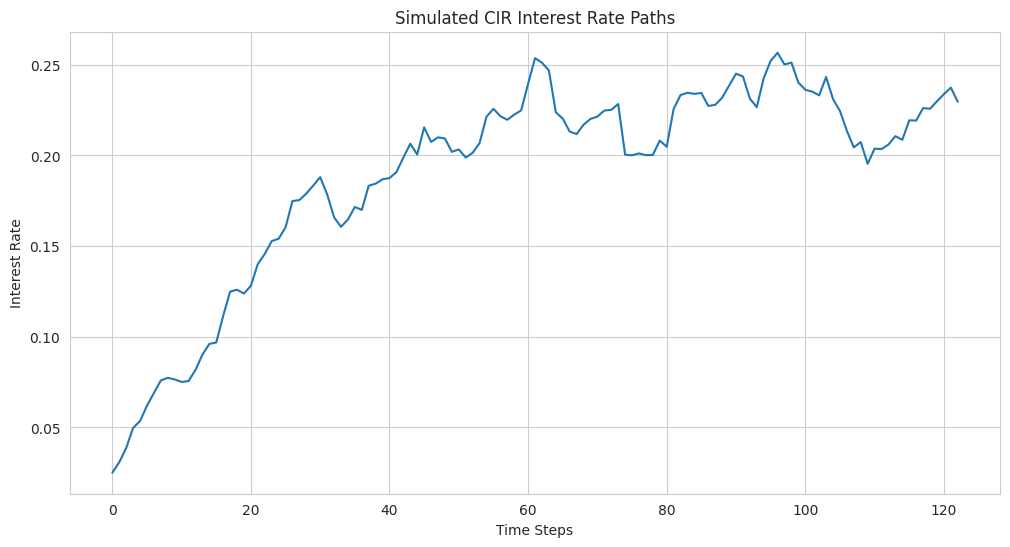

In [246]:
import numpy as np

def simulate_cir_paths(k, theta, sigma, r0, T, N, num_paths):
    dt = T / N
    interest_rate_paths = np.zeros((num_paths, N+1))
    interest_rate_paths[:, 0] = r0
    
    for path in range(num_paths):
        for t in range(1, N+1):
            Z = np.random.randn()
            r = interest_rate_paths[path, t-1]
            interest_rate_paths[path, t] = r + k * (theta - r) * dt + sigma * np.sqrt(dt) * np.sqrt(max(0, r)) * Z
    
    return interest_rate_paths

# Parameters
k = 2.40      # Speed of reversion
theta = 0.30  # Long-term mean
sigma = 0.21  # Volatility
r0 = 0.025     # Initial interest rate
T = 1.0       # Total time period
N = 122       # Number of time steps
num_paths = 1000 # Number of paths

# Simulate the paths
paths = simulate_cir_paths(k, theta, sigma, r0, T, N, num_paths)
mean_path = np.mean(paths, axis=0)
print(len(mean_path))
# Example: Plot the first 10 paths
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(1):
    plt.plot(paths[i])
plt.title('Simulated CIR Interest Rate Paths')
plt.xlabel('Time Steps')
plt.ylabel('Interest Rate')
plt.show()


In [247]:
# adding mean_path to the dataframe tmp_d
tmp_d['mean_paths'] = mean_path

In [248]:
tmp_d

,Actual rate,Simulated,mean_paths
timestamp,,,
03 Jan 2022,0.125256,0.025278,0.025000
10 Jan 2022,0.125249,0.027331,0.030439
17 Jan 2022,0.125213,0.035841,0.035808
24 Jan 2022,0.125461,0.042041,0.041079
31 Jan 2022,0.126335,0.041140,0.046207
...,...,...,...
08 Apr 2024,0.257321,0.264845,0.275397
15 Apr 2024,0.257391,0.284925,0.275780
22 Apr 2024,0.256487,0.264380,0.275932


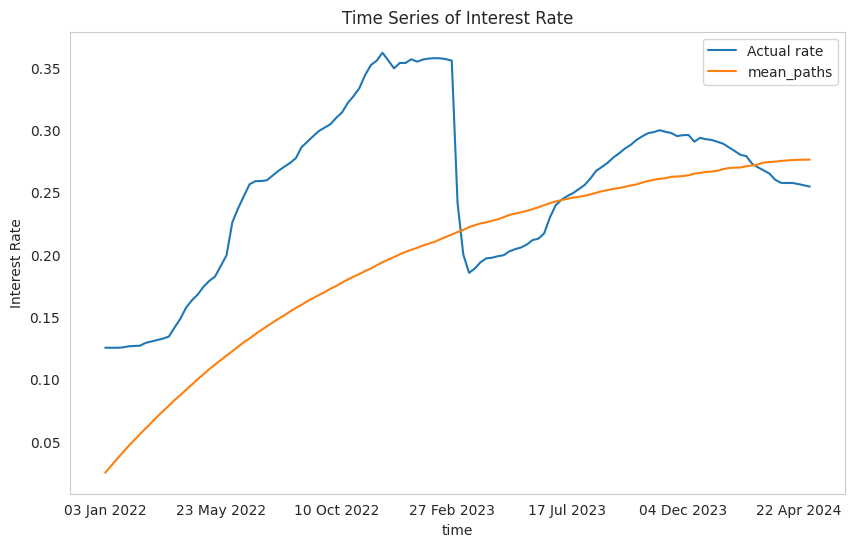

In [249]:
# plot of the actual rate versus the mean_
fig, ax = plt.subplots(figsize=(10, 6))
tmp_d["Actual rate"].plot(xlabel = "time", ylabel="Interest Rate", title = "Time Series of Interest Rate", ax=ax)
tmp_d['mean_paths'].plot(xlabel = "time", ylabel="Interest Rate", title = "Time Series of Interest Rate", ax=ax)
plt.legend()
plt.grid(False)
plt.savefig('combined')

In [252]:
# import numpy as np

# # Parameters
# a = 0.1  # replace with actual value
# b = 0.1  # replace with actual value
# alpha = 0.1  # replace with actual value
# sigma = 0.2  # replace with actual value
# r0 = 0.05  # replace with actual value
# y0 = np.random.normal(0, np.sqrt(sigma**2 / (2 * alpha)))  # initial value of y_t

# # Matrix A and initial values
# A = np.array([[a, b], [0, -alpha]])
# X0 = np.array([r0, y0])

# # Time discretization
# T = 1.0  # Total time
# N = 1000  # Number of time steps
# dt = T / N

# # Initialize arrays
# t = np.linspace(0, T, N + 1)
# X = np.zeros((N + 1, 2))
# X[0, :] = X0

# # Simulate paths
# for i in range(N):
#     dB = np.sqrt(dt) * np.random.normal(0, 1)
#     X[i + 1, :] = X[i, :] + (A @ X[i, :]) * dt + np.array([0, sigma]) * dB

# # Extract r_t and y_t
# r_t = X[:, 0]
# y_t = X[:, 1]

# # Plot results
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(t, r_t, label='r_t')
# plt.plot(t, y_t, label='y_t')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Simulation of r_t and y_t using Euler-Maruyama')
# plt.legend()
# plt.show()


In [253]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Parameters
# a = 0.1  # a parameter in dr_t equation
# b = 0.2  # b parameter in dr_t equation
# alpha = 0.3  # alpha parameter in dy_t equation
# sigma = 0.4  # sigma parameter in dy_t equation

# # Time parameters
# T = 1.0  # Total time
# N = 252  # Number of time steps (assuming daily frequency)
# dt = T / N

# # Initial values
# r_0 = 0.05  # Initial value of r_t
# y_0 = np.random.normal(0, np.sqrt(sigma**2 / (2 * alpha)))  # Initial value of y_t

# # Initialize arrays to store the simulated paths
# r_t = np.zeros(N)
# y_t = np.zeros(N)
# r_t[0], y_t[0] = r_0, y_0

# # Generate Wiener process increments
# np.random.seed(42)
# dB_t = np.random.normal(0, np.sqrt(dt), N)

# # Euler discretization
# for t in range(1, N):
#     dr_t = a * r_t[t-1] * dt + b * y_t[t-1] * r_t[t-1] * dt
#     dy_t = -alpha * y_t[t-1] * dt + sigma * dB_t[t]
#     r_t[t] = r_t[t-1] + dr_t
#     y_t[t] = y_t[t-1] + dy_t

# # Combine into a DataFrame
# dates = pd.date_range(start='2022-01-01', periods=N, freq='D')
# data = pd.DataFrame({'r_t': r_t, 'y_t': y_t}, index=dates)

# # Plot the simulated paths
# plt.figure(figsize=(12, 6))
# plt.plot(data.index, data['r_t'], label='r_t (Interest Rate)')
# plt.plot(data.index, data['y_t'], label='y_t (Mean Reverting Process)')
# plt.legend()
# plt.title('Simulated Paths using Two-Dimensional Euler Discretization')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.show()


In [255]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Parameters
# a = 0.1  # a parameter in dr_t equation
# b = 0.2  # b parameter in dr_t equation
# alpha = 0.3  # alpha parameter in dy_t equation
# sigma = 0.4  # sigma parameter in dy_t equation

# # Time parameters
# T = 1.0  # Total time
# N = 252  # Number of time steps (assuming daily frequency)
# dt = T / N

# # Initial values
# r_0 = 0.125  # Initial value of r_t
# y_0 = np.random.normal(0, np.sqrt(sigma**2 / (2 * alpha)))  # Initial value of y_t
# print(y_0)
# # Initialize arrays to store the simulated paths
# r_t = np.zeros(N)
# y_t = np.zeros(N)
# r_t[0], y_t[0] = r_0, y_0

# # Generate Wiener process increments
# np.random.seed(42)
# dB_t = np.random.normal(0, np.sqrt(dt), N)
# print(dB_t)
# # Euler discretization
# for t in range(1, N):
#     y_t[t] = y_t[t-1] - alpha *y_t[t-1] * dt + sigma * dB_t[t]
#     r_t[t] = r_t[t-1] + a * r_t[t-1] * dt + b * y_t[t-1] * dt

# # Combine into a DataFrame
# dates = pd.date_range(start='2022-01-01', periods=N, freq='D')
# data = pd.DataFrame({'r_t': r_t, 'y_t': y_t}, index=dates)

# # Plot the simulated paths
# plt.figure(figsize=(12, 6))
# plt.plot(data.index, data['r_t'], label='r_t (Interest Rate)')
# plt.plot(data.index, data['y_t'], label='y_t (Mean Reverting Process)')
# plt.legend()
# plt.title('Simulated Paths using Two-Dimensional Euler Discretization')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.show()


In [257]:
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression

# # Load your interest rate data


# # Extract the time series data for r_t
# r_t =rr['Interest Rate']

# # Number of observations
# N = len(r_t)
# dt = 1  # Assuming the time step is 1, adjust if necessary

# # Known parameters for generating y_t (choose initial guesses)
# alpha_guess = 0.1
# sigma_guess = 0.2

# # Generate y_t from N(0, sigma^2 / (2 * alpha))
# y_t = np.random.normal(0, np.sqrt(sigma_guess**2 / (2 * alpha_guess)), N)

# # Calculate differences
# dr_t = np.diff(r_t) / dt
# dy_t = np.diff(y_t) / dt

# # Prepare the design matrices for OLS
# X_r = np.column_stack([r_t[:-1], y_t[:-1]])
# y_r = dr_t

# X_y = -y_t[:-1].reshape(-1, 1)
# y_y = dy_t

# # Fit OLS for r_t to estimate a and b
# model_r = LinearRegression().fit(X_r, y_r)
# a_est, b_est = model_r.coef_

# # Fit OLS for y_t to estimate alpha
# model_y = LinearRegression().fit(X_y, y_y)
# alpha_est = model_y.coef_[0]

# # Estimate sigma from the residuals of the y_t model
# residuals_y = y_y - model_y.predict(X_y)
# sigma_est = np.sqrt(np.mean(residuals_y**2))

# # Print the estimated parameters
# print(f"Estimated a: {a_est}")
# print(f"Estimated b: {b_est}")
# print(f"Estimated alpha: {alpha_est}")
# print(f"Estimated sigma: {sigma_est}")


In [258]:
# import numpy as np
# import matplotlib.pyplot as plt
# #random. seed(10)
# # Parameters (Look for the right estimation pro)
# a = 0.5  # Example value for a
# b = [0,0.05,0.1,0.2] # Example value for b
# c = 0.2  # Example value for c
# s = 0.3  # Example value for s
# T = 1.0  # Total time
# N = 1000  # Number of time steps
# Delta_t = T / N

# # Initial conditions
# x = np.zeros(N+1)
# y = np.zeros(N+1)
# x[0] = 0.1  # Initial value for x
# y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))

# # Time-stepping
# for n in range(N):
#     xi_n = np.random.normal(0, 1)
#     for i in b:
#         x[n+1] = x[n] + a * x[n] * Delta_t + i * y[n] * Delta_t
#     y[n+1] = y[n] - c * y[n] * Delta_t + s * np.sqrt(Delta_t) * xi_n

# # Time vector for plotting
# t = np.linspace(0, T, N+1)

# # Plot the results
# plt.figure(figsize=(14, 6))

# plt.subplot(2, 1, 1)
# plt.plot(t, x, label='x(t)')
# plt.title('Discretized SDE Solution')
# plt.xlabel('Time')
# plt.ylabel('x(t)')
# plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(t, y, label='y(t)', color='orange')
# plt.xlabel('Time')
# plt.ylabel('y(t)')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [260]:
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression

# # Assuming 'data' is your pandas DataFrame with time series data 'y'
# y = rr['Interest Rate']/100
# Delta_t = 1  # Adjust this according to your data's time step

# # Calculate diff_y
# diff_y = (y[1:] - y[:-1])  
# y_t = y[:-1]*Delta_t

# # OLS to estimate c
# X = y_t.reshape(-1, 1)
# model = LinearRegression(fit_intercept=False)
# model.fit(X, diff_y)
# c_estimated = -model.coef_[0]

# # Calculate residuals
# residuals = diff_y + c_estimated * y_t

# # Estimate s
# s_estimated = np.sqrt(np.mean(residuals**2 / Delta_t))

# print(f"Estimated c: {c_estimated}")
# print(f"Estimated s: {s_estimated}")


The code below is for the OLS of the colored Noise

In [261]:
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression

# # Load your data
# # Assuming 'rr' is your pandas DataFrame with time series data 'Interest Rate'
# # Example: rr = pd.read_csv('your_data.csv')
# # Ensure that 'Interest Rate' column exists and contains the rate in percentage

# # Normalize interest rates (convert to fraction)
# y = rr['Interest Rate'].values / 100

# # Time step (assuming 1 for simplicity, adjust if your data has a different time step)
# Delta_t = 1

# # Calculate the change in y (diff_y)
# diff_y = y[1:] - y[:-1]

# # Adjust y for time step
# y_t = y[:-1] * Delta_t

# # Convert y_t to numpy array and reshape
# X = y_t.reshape(-1, 1)

# # OLS to estimate c
# model = LinearRegression(fit_intercept=False)
# model.fit(X, diff_y)
# c_estimated = -model.coef_[0]

# # Calculate residuals
# residuals = diff_y + c_estimated * y_t

# # Estimate s
# s_estimated = np.sqrt(np.mean(residuals**2 / Delta_t))

# print(f"Estimated c: {c_estimated}")
# print(f"Estimated s: {s_estimated}")


The code below is for the sensitivity analysis.

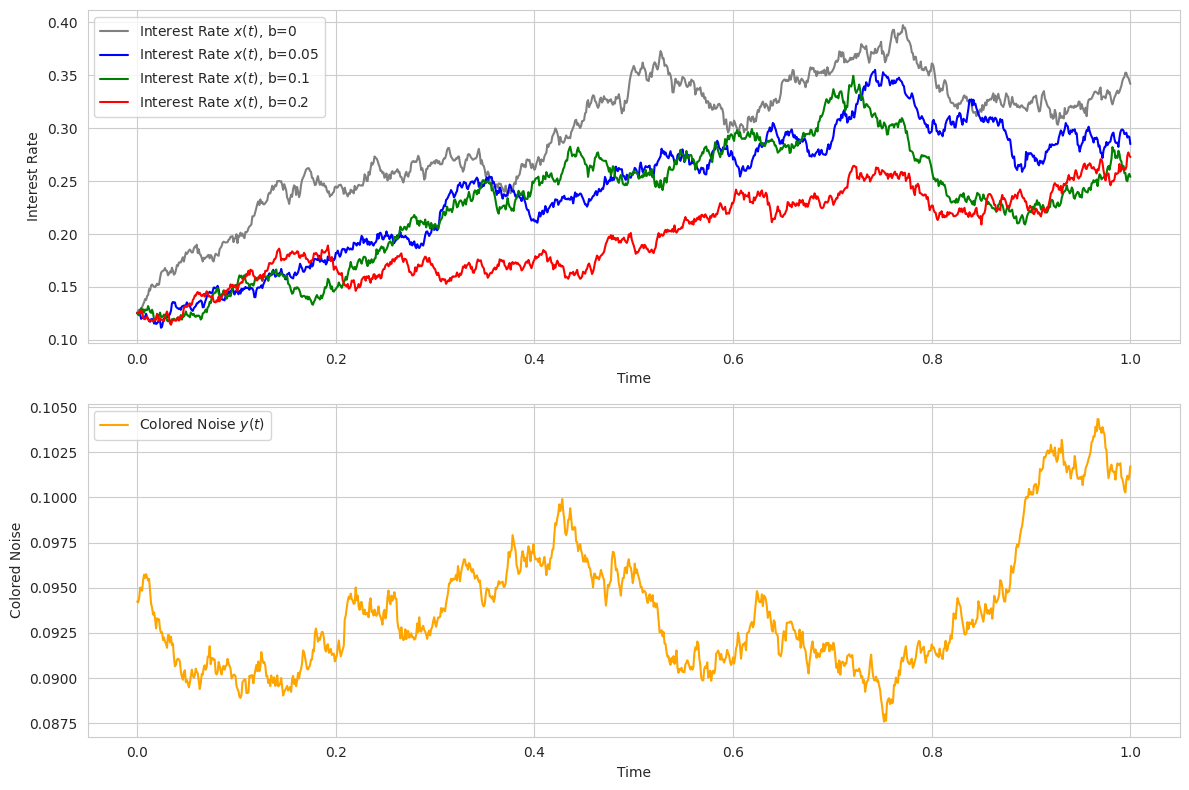

In [262]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.9
beta = 0.29
sigma = 0.21
c = 0.002
s = 0.012

# Simulation parameters
T = 1.0  # Total time
dt = 0.001  # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions
np.random.seed(42)  # For reproducibility
x0 = np.array(rr['Interest Rate'] /100)[0]# Initial interest rate
y0 = np.random.normal(0, np.sqrt(s**2 / (2 * c)))  # Initial colored noise

# Values of b to test
b_values = [0,0.05, 0.1, 0.2]
colors = ['grey','blue', 'green', 'red']

# Store y(t) which is the same for all b values
y = np.zeros(N+1)
t = np.linspace(0, T, N+1)
y[0] = y0

# Simulate y(t) using Euler-Maruyama method
for n in range(N):
    eta_n = np.random.normal(0, 1)
    y[n+1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n

plt.figure(figsize=(12, 8))

for idx, b in enumerate(b_values):
    # Initialize arrays to store the results
    x = np.zeros(N+1)

    # Set initial condition
    x[0] = x0

    # Simulate the SDEs using Euler-Maruyama method
    for n in range(N):
        xi_n = np.random.normal(0, 1)
        x[n+1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n

    # Plot x(t) results
    plt.subplot(2, 1, 1)
    plt.plot(t, x, label=f'Interest Rate $x(t)$, b={b}', color=colors[idx])
    plt.xlabel('Time')
    plt.ylabel('Interest Rate')
    plt.legend()

# Plot y(t) results
plt.subplot(2, 1, 2)
plt.plot(t, y, label='Colored Noise $y(t)$', color='orange')
plt.xlabel('Time')
plt.ylabel('Colored Noise')
plt.legend()

plt.tight_layout()
plt.savefig('doc')


In [264]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error

# # Parameters
# alpha = 2.9
# beta = 0.29
# sigma = 0.21
# c = 0.002
# s = 0.012

# # Simulation parameters
# T = 1.0  # Total time
# dt = 0.001  # Time step
# N = int(T / dt)  # Number of time steps

# # Initial conditions
# np.random.seed(42)  # For reproducibility
# x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate
# y0 = np.random.normal(0, np.sqrt(s**2 / (2 * c)))  # Initial colored noise

# # Values of b to test
# b_values = [0, 0.05, 0.1, 0.2]
# colors = ['grey', 'blue', 'green', 'red']

# # Store y(t) which is the same for all b values
# y = np.zeros(N + 1)
# t = np.linspace(0, T, N + 1)
# y[0] = y0

# # Simulate y(t) using Euler-Maruyama method
# for n in range(N):
#     eta_n = np.random.normal(0, 1)
#     y[n + 1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n

# plt.figure(figsize=(12, 8))

# # Assuming observed data is available
# observed_data = np.array(rr['Interest Rate'] / 100)

# for idx, b in enumerate(b_values):
#     # Initialize arrays to store the results
#     x = np.zeros(N + 1)

#     # Set initial condition
#     x[0] = x0

#     # Simulate the SDEs using Euler-Maruyama method
#     for n in range(N):
#         xi_n = np.random.normal(0, 1)
#         x[n + 1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n

#     # Plot x(t) results
#     plt.subplot(2, 1, 1)
#     plt.plot(t, x, label=f'Interest Rate $x(t)$, b={b}', color=colors[idx])
#     plt.xlabel('Time')
#     plt.ylabel('Interest Rate')
#     plt.legend()

#     # Calculate the MSE
#     mse = mean_squared_error(observed_data[:N+1], x)
#     print(f'Mean Squared Error for b={b}: {mse}')

# # Plot y(t) results
# plt.subplot(2, 1, 2)
# plt.plot(t, y, label='Colored Noise $y(t)$', color='orange')
# plt.xlabel('Time')
# plt.ylabel('Colored Noise')
# plt.legend()

# plt.tight_layout()
# plt.savefig('doc')
# plt.show()


In [265]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error

# # Parameters
# alpha = 2.9
# beta = 0.29
# sigma = 0.21
# c = 0.02
# s = 0.002

# # Simulation parameters
# T = 1.0  # Total time
# dt = 0.001  # Time step
# N = int(T / dt)  # Number of time steps

# # Initial conditions
# np.random.seed(42)  # For reproducibility
# x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate
# y0 = np.random.normal(0, np.sqrt(s**2 / (2 * c)))  # Initial colored noise

# # Values of b to test
# b_values = [2, 3, 4,5]
# colors = ['grey', 'blue', 'green', 'red']

# # Store y(t) which is the same for all b values
# y = np.zeros(N + 1)
# t = np.linspace(0, T, N + 1)
# y[0] = y0

# # Simulate y(t) using Euler-Maruyama method
# for n in range(N):
#     eta_n = np.random.normal(0, 1)
#     y[n + 1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n

# plt.figure(figsize=(12, 8))

# # Assuming observed data is available
# observed_data = np.array(rr['Interest Rate'] / 100)

# # Make sure to match the lengths
# observed_length = len(observed_data)
# simulated_length = min(N + 1, observed_length)

# for idx, b in enumerate(b_values):
#     # Initialize arrays to store the results
#     x = np.zeros(N + 1)

#     # Set initial condition
#     x[0] = x0

#     # Simulate the SDEs using Euler-Maruyama method
#     for n in range(N):
#         xi_n = np.random.normal(0, 1)
#         x[n + 1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n

#     # Plot x(t) results
#     plt.subplot(2, 1, 1)
#     plt.plot(t, x, label=f'Interest Rate $x(t)$, b={b}', color=colors[idx])
#     plt.xlabel('Time')
#     plt.ylabel('Interest Rate')
#     plt.legend()

#     # Calculate the MSE
#     mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
#     print(f'Mean Squared Error for b={b}: {mse}')

# # Plot y(t) results
# plt.subplot(2, 1, 2)
# plt.plot(t, y, label='Colored Noise $y(t)$', color='orange')
# plt.xlabel('Time')
# plt.ylabel('Colored Noise')
# plt.legend()

# plt.tight_layout()
# plt.savefig('doc')
# plt.show()


In [266]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error
# import pandas as pd  # Assuming you have the rr DataFrame with the Interest Rate data

# # Example data for Interest Rate
# rr = pd.DataFrame({'Interest Rate': np.random.rand(123) * 10})

# # Parameters
# alpha = 2.9
# beta = 0.29
# sigma = 0.21

# # Simulation parameters
# T = 1.0  # Total time
# dt = 0.001  # Time step
# N = int(T / dt)  # Number of time steps

# # Initial conditions
# np.random.seed(42)  # For reproducibility
# x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate

# # Values of b, c, and s to test
# b_values = [0, 0.05, 0.1, 0.2]
# c_values = [0.002, 0.004, 0.006, 0.008]
# s_values = [0.01, 0.02, 0.03, 0.04]

# # Assuming observed data is available
# observed_data = np.array(rr['Interest Rate'] / 100)

# # Make sure to match the lengths
# observed_length = len(observed_data)
# simulated_length = min(N + 1, observed_length)

# # Function to simulate y(t) using Euler-Maruyama method
# def simulate_y(c, s):
#     y = np.zeros(N + 1)
#     y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))
#     for n in range(N):
#         eta_n = np.random.normal(0, 1)
#         y[n + 1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n
#     return y

# # Function to simulate x(t) using Euler-Maruyama method
# def simulate_x(b, y):
#     x = np.zeros(N + 1)
#     x[0] = x0
#     for n in range(N):
#         xi_n = np.random.normal(0, 1)
#         x[n + 1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n
#     return x

# plt.figure(figsize=(15, 10))
# for idx_b, b in enumerate(b_values):
#     for idx_c, c in enumerate(c_values):
#         for idx_s, s in enumerate(s_values):
#             # Simulate y(t)
#             y = simulate_y(c, s)
            
#             # Simulate x(t)
#             x = simulate_x(b, y)
            
#             # Calculate the MSE
#             mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
#             print(f'MSE for b={b}, c={c}, s={s}: {mse}')
            
#             # Plot x(t) results
#             plt.subplot(2, 1, 1)
#             plt.plot(t, x, label=f'x(t) b={b}, c={c}, s={s}')
            
# plt.subplot(2, 1, 1)
# plt.xlabel('Time')
# plt.ylabel('Interest Rate')
# plt.title('Sensitivity Analysis on Interest Rate Model')
# plt.legend(fontsize='small')

# # Plot y(t) results for the last c and s
# plt.subplot(2, 1, 2)
# plt.plot(t, y, label='Colored Noise y(t)', color='orange')
# plt.xlabel('Time')
# plt.ylabel('Colored Noise')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [268]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Parameters
# alpha = 2.9  # Example value for alpha
# sigma = 0.21  # Example value for sigma
# n_samples = 123  # Number of samples to generate
# dt = 1  # Time step

# # Initial condition for y_0
# np.random.seed(42)  # For reproducibility
# y0 = np.random.normal(0, np.sqrt(sigma**2 / (2 * alpha)))

# # Initialize the array to store the values of y_t
# y = np.zeros(n_samples)
# y[0] = y0

# # Generate the values using Euler-Maruyama method
# for t in range(1, n_samples):
#     y[t] = y[t-1] - alpha * y[t-1] * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1)

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(y, label='y(t)')
# plt.title('Simulated values of y(t)')
# plt.xlabel('Time step')
# plt.ylabel('y(t)')
# plt.legend()
# plt.grid()
# plt.show()

# # Print the generated values
# print(y)

# # Convert to pandas DataFrame for better visualization
# y_df = pd.DataFrame(y, columns=['y_t'])
# print(y_df)


In [269]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Simulation parameters
# T = 1.0  # Total time
# dt = 0.01  # Time step
# N = int(T / dt)  # Number of time steps
# num_simulations = 5  # Number of simulations for each parameter set

# # Parameter ranges
# c_values = [0.1, 0.5, 1.0]
# s_values = [0.1, 0.2, 0.5]

# # Function to simulate y(t)
# def simulate_colored_noise(c, s, N, dt):
#     y = np.zeros(N+1)
#     y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))
#     for n in range(N):
#         y[n+1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * np.random.normal(0, 1)
#     return y

# # Plot the results
# plt.figure(figsize=(14, 10))
# for c in c_values:
#     for s in s_values:
#         for sim in range(num_simulations):
#             y = simulate_colored_noise(c, s, N, dt)
#             plt.plot(np.linspace(0, T, N+1), y, label=f'c={c}, s={s}', alpha=0.5)

# plt.xlabel('Time')
# plt.ylabel('y(t)')
# plt.title('Colored Noise Simulation for Different c and s values')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


The code below is from the lecturer.

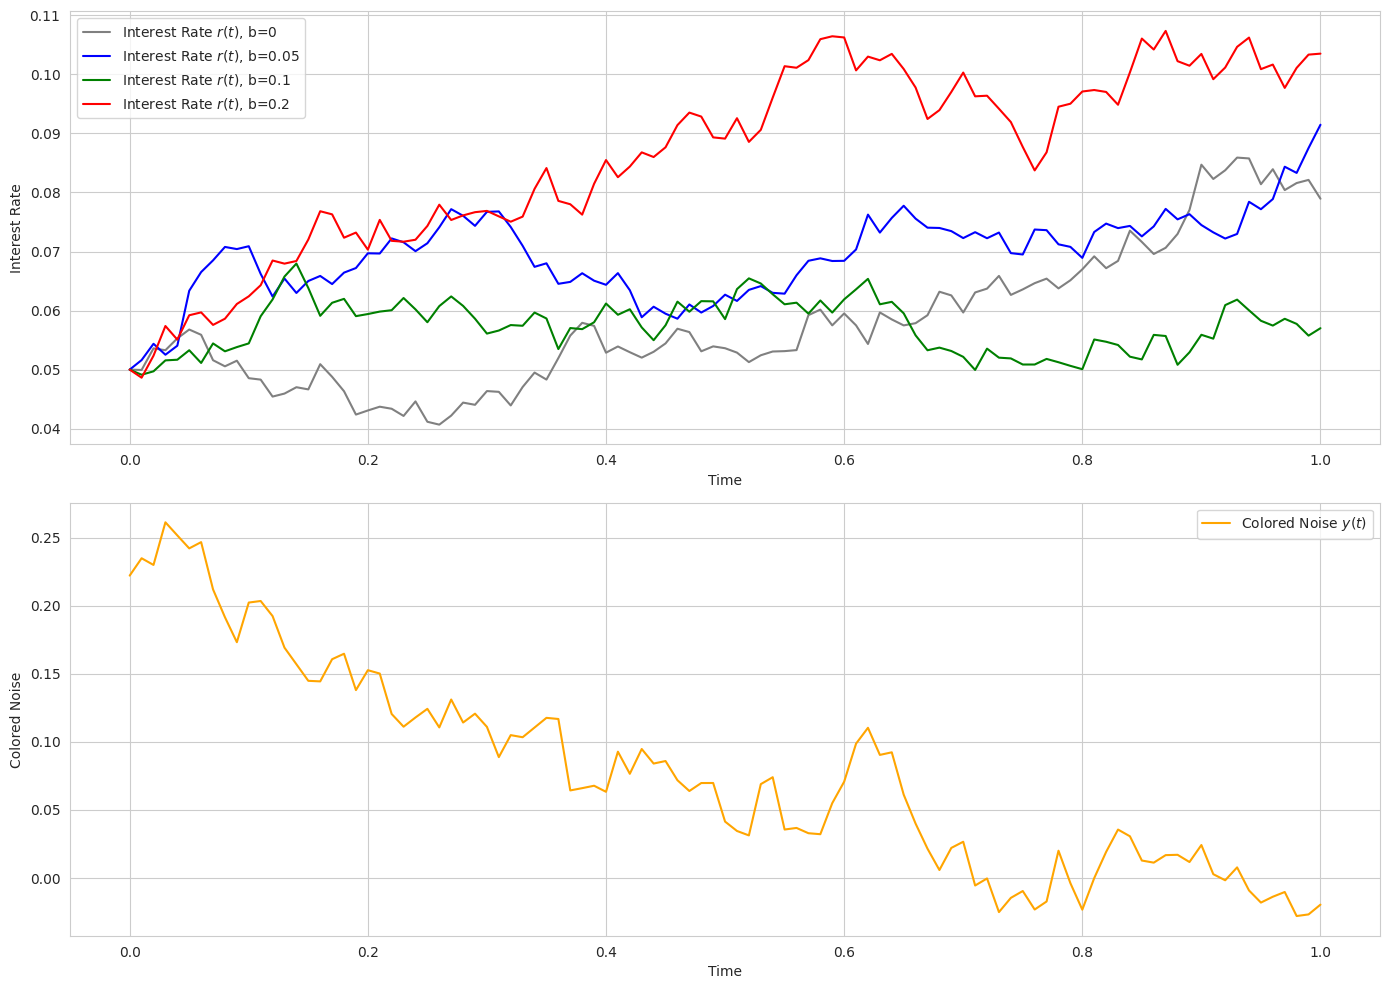

In [270]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 0.5     # Speed of mean reversion
theta = 0.1  # Long-term mean
sigma = 0.1  # Volatility of interest rate
c = 0.1      # Speed of mean reversion for y(t)
s = 0.2      # Volatility of y(t)
T = 1.0      # Total time
dt = 0.01    # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions
np.random.seed(42)  # For reproducibility
r0 = 0.05  # Initial interest rate
y0 = np.random.normal(0, np.sqrt(s**2 / (2 * c)))  # Initial colored noise

# Values of b to test
b_values = [0, 0.05, 0.1, 0.2]
colors = ['grey', 'blue', 'green', 'red']

# Function to simulate CIR model with colored noise
def simulate_cir_with_noise(k, theta, sigma, b, c, s, r0, y0, N, dt):
    r = np.zeros(N+1)
    y = np.zeros(N+1)
    r[0] = r0
    y[0] = y0
    for n in range(N):
        dZ = np.random.normal(0, np.sqrt(dt))
        dW = np.random.normal(0, np.sqrt(dt))
        y[n+1] = y[n] - c * y[n] * dt + s * dW
        r[n+1] = r[n] + k * (theta - r[n]) * dt + b * y[n] * dt + sigma * np.sqrt(np.abs(r[n])) * dZ
    return r, y

# Plot the results
plt.figure(figsize=(14, 10))

for idx, b in enumerate(b_values):
    r, y = simulate_cir_with_noise(k, theta, sigma, b, c, s, r0, y0, N, dt)
    t = np.linspace(0, T, N+1)
    
    # Plot r(t) results
    plt.subplot(2, 1, 1)
    plt.plot(t, r, label=f'Interest Rate $r(t)$, b={b}', color=colors[idx])
    plt.xlabel('Time')
    plt.ylabel('Interest Rate')
    plt.legend()
    
    # Plot y(t) results
    if idx == 0:  # Plot y(t) once since it's the same for all b values
        plt.subplot(2, 1, 2)
        plt.plot(t, y, label='Colored Noise $y(t)$', color='orange')
        plt.xlabel('Time')
        plt.ylabel('Colored Noise')
        plt.legend()

plt.tight_layout()
plt.show()


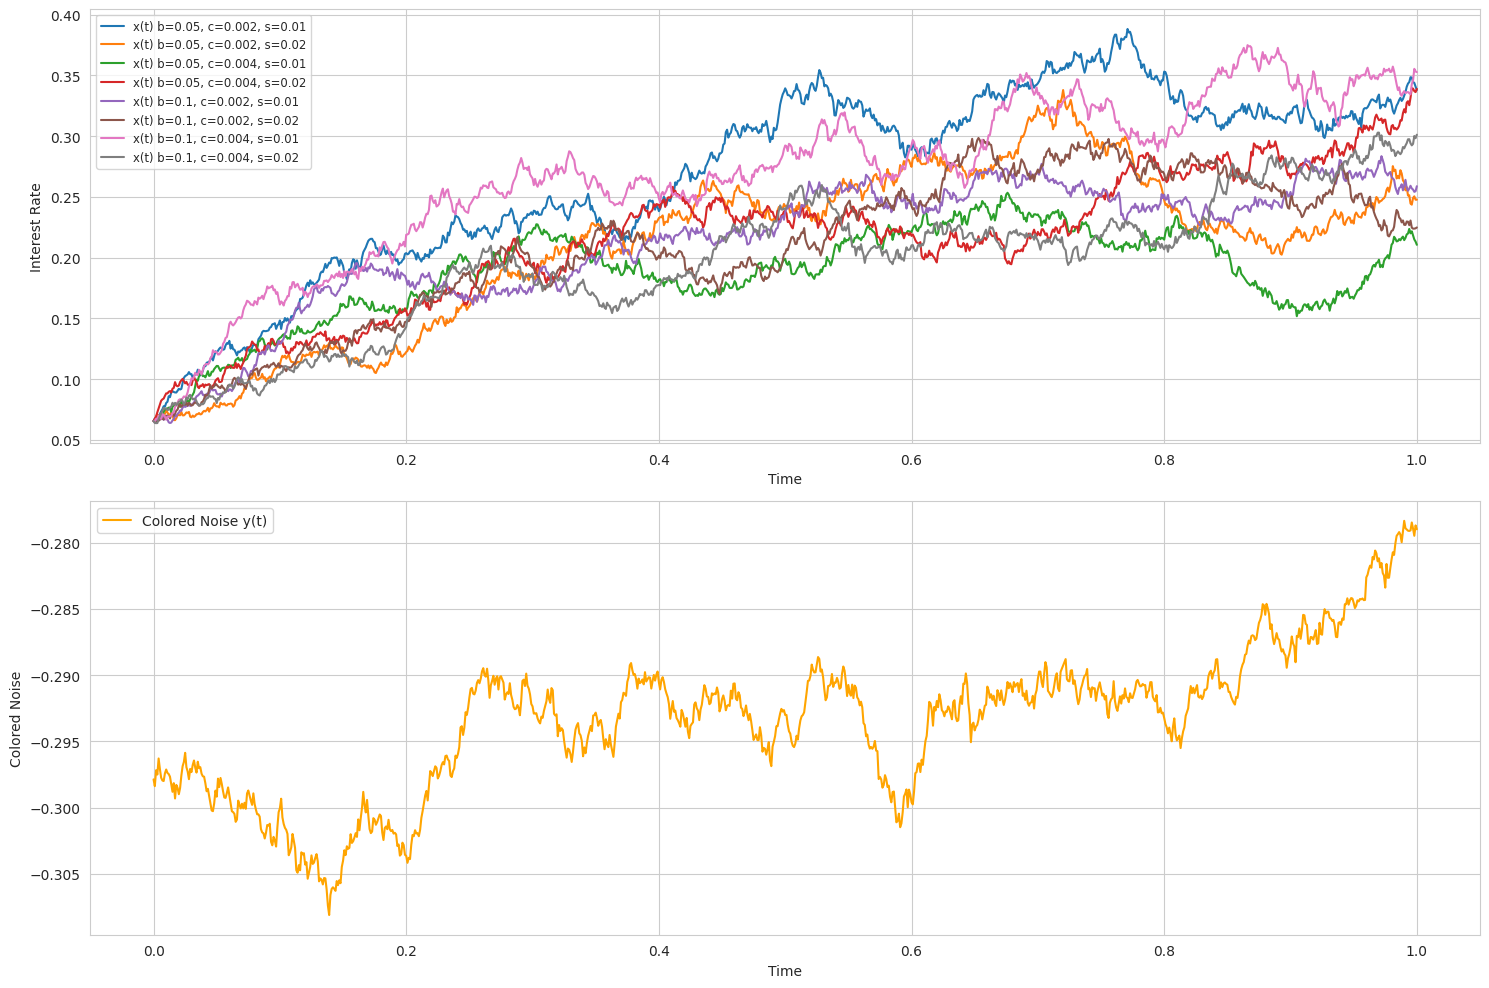

In [274]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd  # Assuming you have the rr DataFrame with the Interest Rate data

# Example data for Interest Rate
rr = pd.DataFrame({'Interest Rate': np.random.rand(123) * 10})

# Parameters
alpha = 2.9
beta = 0.29
sigma = 0.21

# Simulation parameters
T = 1.0  # Total time
dt = 0.001  # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions
np.random.seed(42)  # For reproducibility
x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate

# Values of b, c, and s to test (reduced)
b_values = [0.05, 0.1]
c_values = [0.002, 0.004]
s_values = [0.01, 0.02]

# Assuming observed data is available
observed_data = np.array(rr['Interest Rate'] / 100)

# Make sure to match the lengths
observed_length = len(observed_data)
simulated_length = min(N + 1, observed_length)

# Function to simulate y(t) using Euler-Maruyama method
def simulate_y(c, s):
    y = np.zeros(N + 1)
    y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))
    for n in range(N):
        eta_n = np.random.normal(0, 1)
        y[n + 1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n
    return y

# Function to simulate x(t) using Euler-Maruyama method
def simulate_x(b, y):
    x = np.zeros(N + 1)
    x[0] = x0
    for n in range(N):
        xi_n = np.random.normal(0, 1)
        x[n + 1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n
    return x

plt.figure(figsize=(15, 10))
for idx_b, b in enumerate(b_values):
    for idx_c, c in enumerate(c_values):
        for idx_s, s in enumerate(s_values):
            # Simulate y(t)
            y = simulate_y(c, s)
            
            # Simulate x(t)
            x = simulate_x(b, y)
            
            # Calculate the MSE
            mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
#             print(f'MSE for b={b}, c={c}, s={s}: {mse}')
            
            # Plot x(t) results
            plt.subplot(2, 1, 1)
            plt.plot(np.linspace(0, T, N + 1), x, label=f'x(t) b={b}, c={c}, s={s}')
            
plt.subplot(2, 1, 1)
plt.xlabel('Time')
plt.ylabel('Interest Rate')
# plt.title('Sensitivity Analysis on Interest Rate Model')
plt.legend(fontsize='small')

# Plot y(t) results for the last c and s
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, T, N + 1), y, label='Colored Noise y(t)', color='orange')
plt.xlabel('Time')
plt.ylabel('Colored Noise')
plt.legend()

plt.tight_layout()
plt.savefig('color')
